In [ ]:
# 01_data_cleaning_eda.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To display all columns and avoid truncation
pd.set_option('display.SSmax_columns', None)


In [2]:
# Load raw dataset
df = pd.read_csv('../data/raw/water_potability.csv')

# Display first few rows
df.head()


ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [3]:
print("Shape of dataset:", df.shape)
df.info()
df.describe()


Shape of dataset: (3276, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [4]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage (%)': missing_percent
})
missing_df


Missing Values  Percentage (%)
Sulfate                     781       23.840049
ph                          491       14.987790
Trihalomethanes             162        4.945055
Hardness                      0        0.000000
Solids                        0        0.000000
Chloramines                   0        0.000000
Conductivity                  0        0.000000
Organic_carbon                0        0.000000
Turbidity                     0        0.000000
Potability                    0        0.000000

In [5]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df[df.columns] = imputer.fit_transform(df)

# Check again
df.isna().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [6]:
duplicates = df.duplicated().sum()
print("Duplicate rows:", duplicates)

if duplicates > 0:
    df = df.drop_duplicates()


Duplicate rows: 0


In [7]:
df.dtypes


ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability         float64
dtype: object

In [8]:
df = df.apply(pd.to_numeric, errors='coerce')


In [9]:
df.to_csv('../data/processed/water_potability_clean.csv', index=False)
print("✅ Cleaned dataset saved successfully!")


✅ Cleaned dataset saved successfully!


C:\Users\vatsa\AppData\Local\Temp\ipykernel_6124\2630336851.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Potability', data=df, palette='coolwarm')


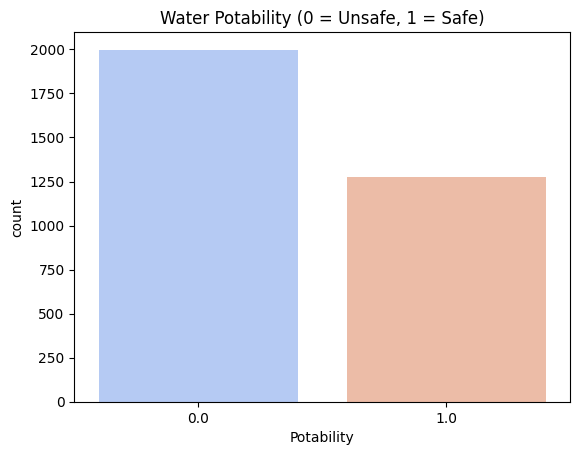

Potability
0.0    60.989011
1.0    39.010989
Name: proportion, dtype: float64


In [10]:
sns.countplot(x='Potability', data=df, palette='coolwarm')
plt.title("Water Potability (0 = Unsafe, 1 = Safe)")
plt.show()

print(df['Potability'].value_counts(normalize=True) * 100)


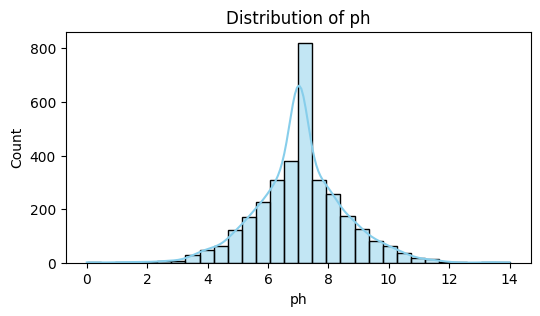

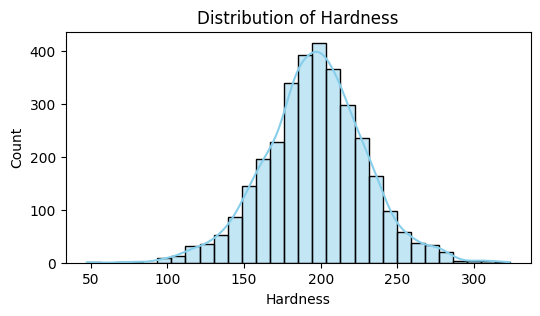

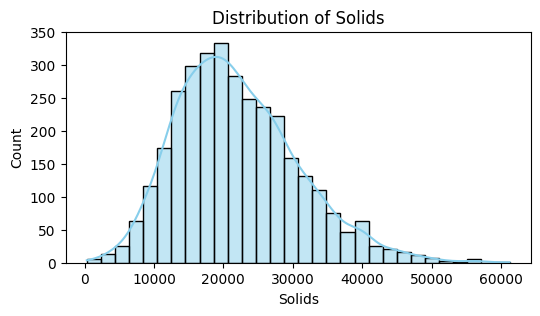

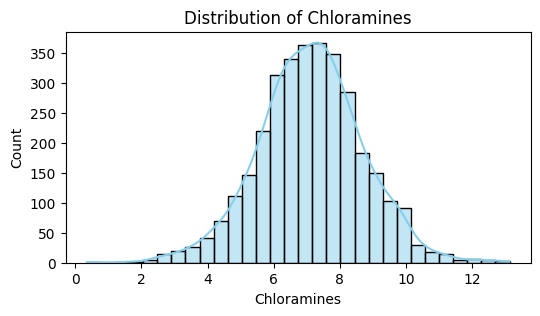

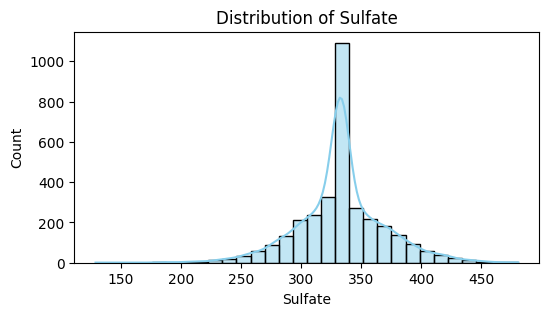

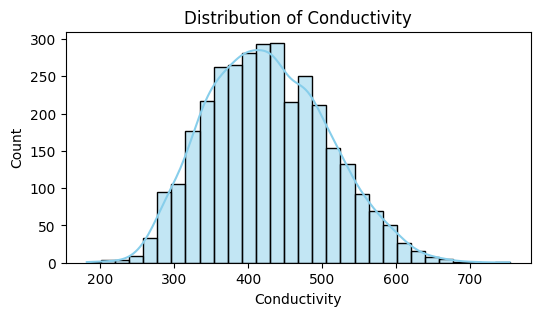

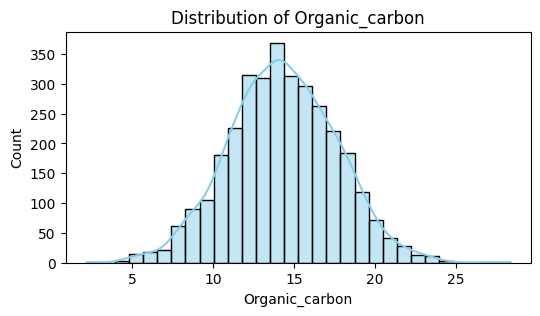

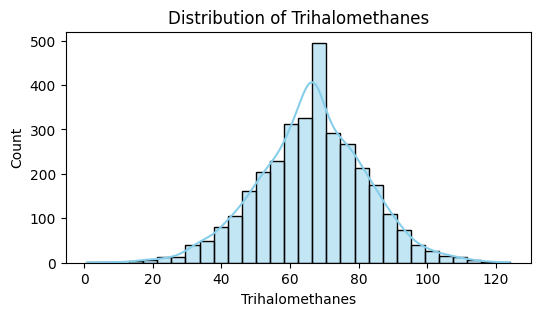

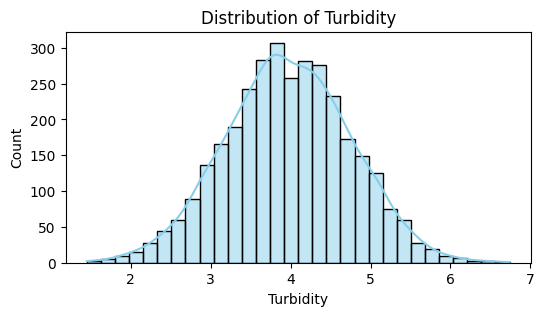

In [11]:
num_cols = df.columns[:-1]  # exclude Potability column

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()


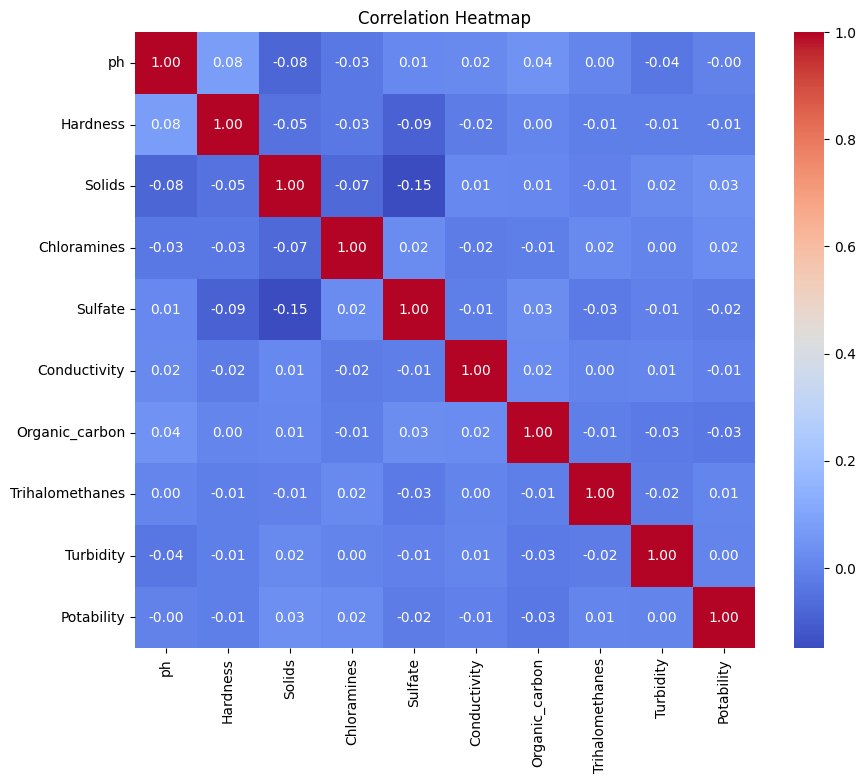

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


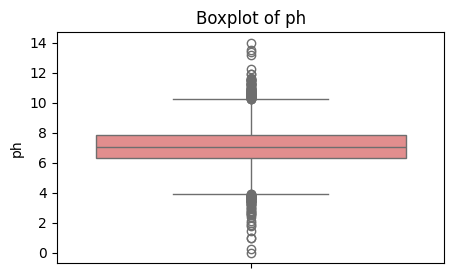

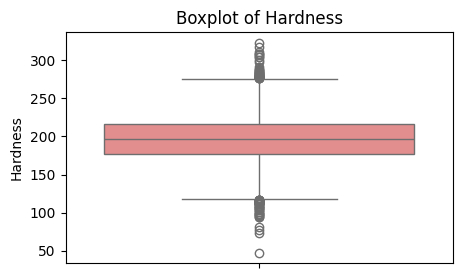

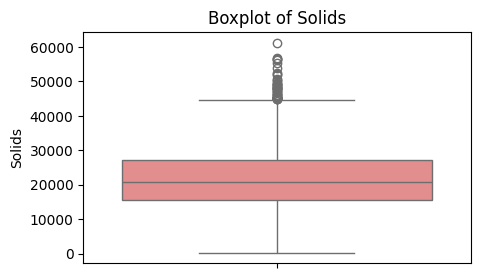

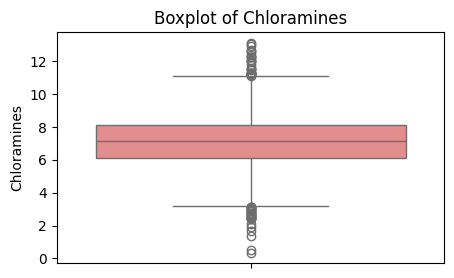

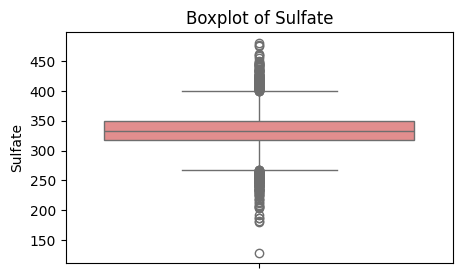

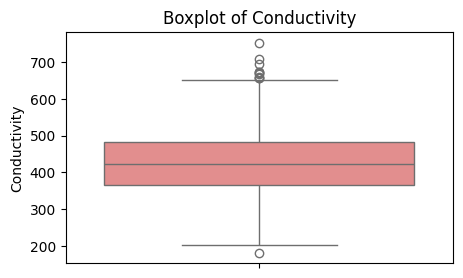

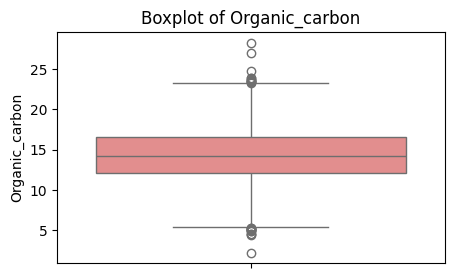

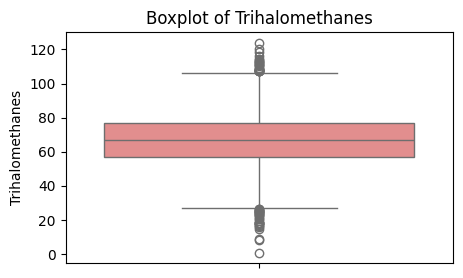

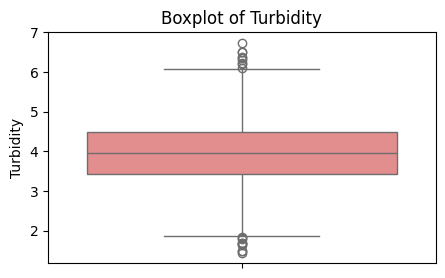

In [13]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
    plt.show()
